In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the xlsx file

df = pd.read_excel('ycsb_output.xlsx', sheet_name='Sheet1')

In [4]:
df.head()

,Measure,Metric,Value_mongo,Value_SQL
0,OVERALL,RunTime(ms),3590.000000,96190.000000
1,OVERALL,Throughput(ops/sec),2785.515320,103.960911
2,TOTAL_GCS_PS_Scavenge,Count,3.000000,9.000000
3,TOTAL_GC_TIME_PS_Scavenge,Time(ms),75.000000,48.000000
4,TOTAL_GC_TIME_%_PS_Scavenge,Time(%),2.089136,0.049901


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      24 non-null     object 
 1   Metric       24 non-null     object 
 2   Value_mongo  24 non-null     float64
 3   Value_SQL    24 non-null     float64
dtypes: float64(2), object(2)
memory usage: 896.0+ bytes


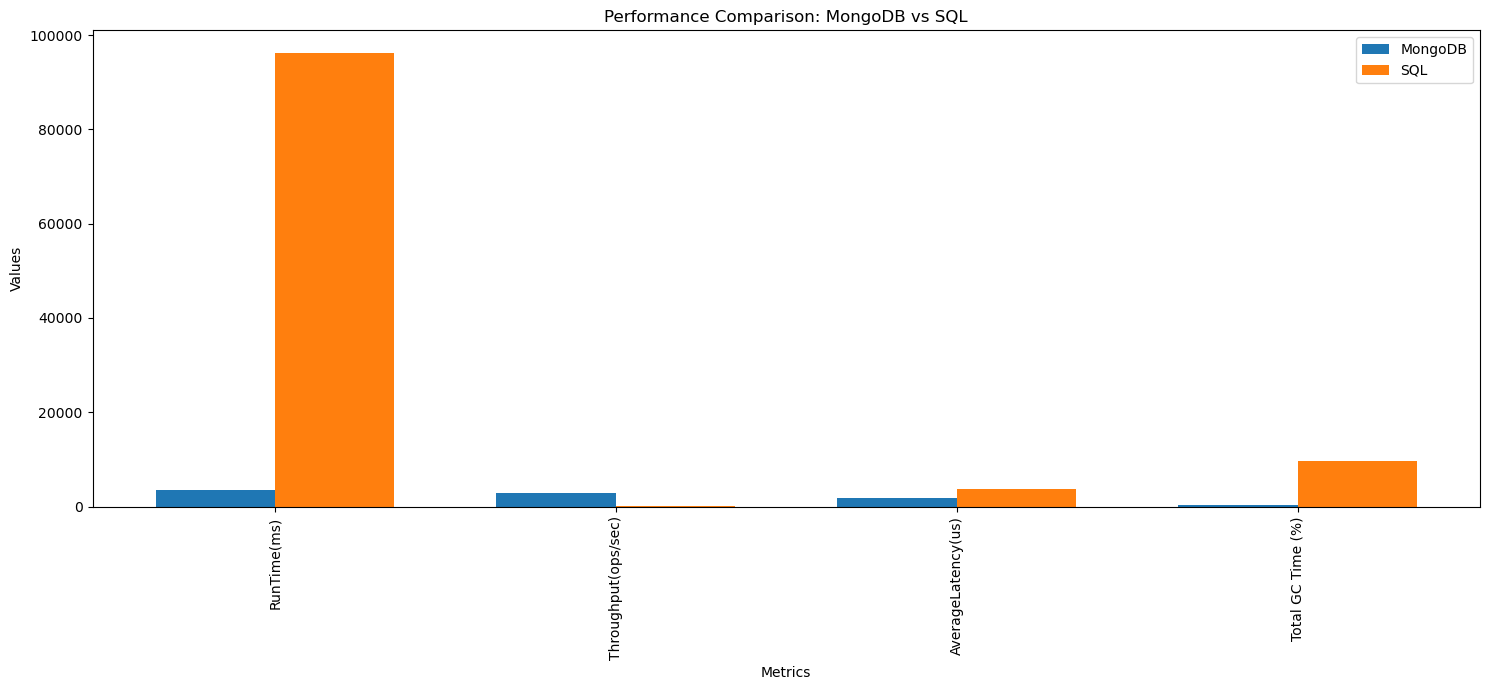

In [14]:
# select key metrics
key_metrics = ['RunTime(ms)', 'Throughput(ops/sec)', 'AverageLatency(us)', 'Total GC Time (%)']

# filter the dataframe to only include key metrics
df_key_metrics = df[df['Metric'].isin(key_metrics)]

# create a figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# generate indices for bars
indices = np.arange(len(key_metrics))

# create bar plot for each key metric
bar_width = 0.35
bar1 = ax.bar(indices - bar_width/2, df_key_metrics['Value_mongo'], bar_width, label='MongoDB')
bar2 = ax.bar(indices + bar_width/2, df_key_metrics['Value_SQL'], bar_width, label='SQL')

# add labels, title and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Performance Comparison: MongoDB vs SQL')
ax.legend()

# Set x-axis tick labels to the names of the key metrics
ax.set_xticks(indices)
ax.set_xticklabels(key_metrics, rotation='vertical')

# show the plot
plt.tight_layout()
plt.show()